## Imports

## Config

In [1]:
feature_list_id = 'magic_qid'

## Read Data

In [2]:
df_questions_train = pd.read_csv(data_folder + 'train.csv').fillna('')
df_questions_test = pd.read_csv(data_folder + 'test.csv').fillna('')

## Build Features

### Extract hashes (jturkewitz script)

In [3]:
max_id = 0

In [4]:
max_train_id = 0

In [5]:
question_hashes = {}

In [6]:
train_orig = df_questions_train
test_orig = df_questions_test

In [7]:
questions_flattened_train = train_orig[['question1', 'question2']].values.reshape(-1,)
questions_flattened_test = test_orig[['question1', 'question2']].values.reshape(-1,)

In [8]:
for question in questions_flattened_train:
    if question not in question_hashes:
        question_hashes[question] = max_id
        max_id += 1

In [9]:
max_train_id = max_id

In [10]:
# ratio = 507000 / len(test_orig)
ratio = 1.0 / 6.0

for question in questions_flattened_test:
    if question not in question_hashes:
        question_hashes[question] = max_train_id + ratio * (max_id - max_train_id)
        max_id += 1

In [11]:
train_cp = train_orig.copy()
test_cp = test_orig.copy()
train_cp.drop(['qid1', 'qid2'], axis=1, inplace=True)

test_cp['is_duplicate'] = -1
test_cp.rename(columns={'test_id': 'id'}, inplace=True)
comb = pd.concat([train_cp, test_cp])

comb['q1_hash'] = comb['question1'].map(lambda q: question_hashes[q] if question_hashes[q])
comb['q2_hash'] = comb['question2'].map(question_hashes)

comb['q_hash_min'] = np.min(comb[['q1_hash', 'q2_hash']], axis=1)

In [12]:
columns_to_keep = [
    'q_hash_min',
]

X_train = comb[comb['is_duplicate'] >= 0][columns_to_keep]
X_test = comb[comb['is_duplicate'] < 0][columns_to_keep]

## Save feature names

In [13]:
feature_names = [
    'magic_qid_hash_min',
]

In [14]:
save_lines(feature_names, features_data_folder + f'X_train_{feature_list_id}.names')

## Save features

In [15]:
save(X_train.values, features_data_folder + f'X_train_{feature_list_id}.pickle')

In [16]:
save(X_test.values, features_data_folder + f'X_test_{feature_list_id}.pickle')

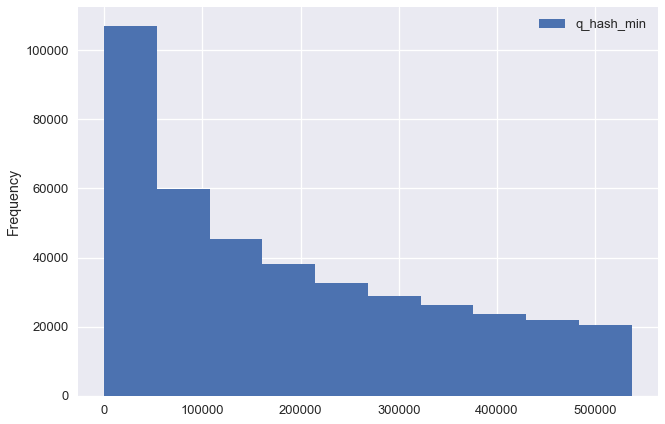

In [17]:
X_train.plot.hist()

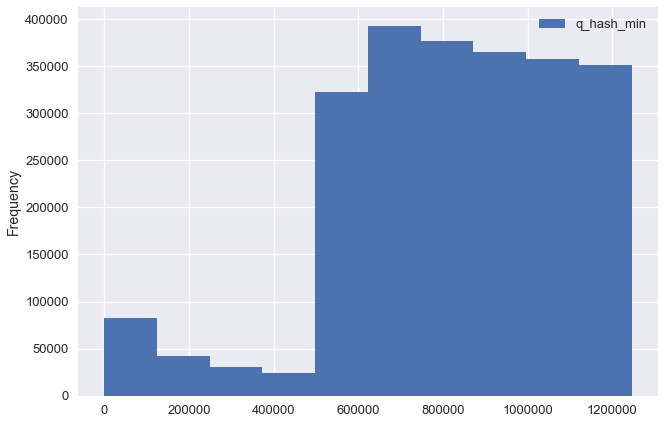

In [18]:
X_test.plot.hist()